## Import both Data Sets

In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv('UsedCars_Delhi.csv')
df1 = df1.drop(['brand','full_model_name','model_name'], axis=1)
df1['fuel_type'] = df1['fuel_type'].map({'Diesel' : 0, 'Petrol' : 1})
df1 = pd.get_dummies(df1, columns=['city'], drop_first= True)
df2 = pd.read_csv('measures_v2.csv')
columns_df2 = df2.columns
print(df1)


     Unnamed: 0  year      price  distance_travelled(kms)  fuel_type  \
0             0  2019   475000.0                  11733.0        1.0   
1             1  2013   450000.0                  41931.0        1.0   
2             2  2018  5175000.0                  14880.0        0.0   
3             3  2014   300000.0                  41606.0        1.0   
4             4  2018  1650000.0                  16000.0        1.0   
..          ...   ...        ...                      ...        ...   
241         241  2016   435000.0                  52000.0        1.0   
242         242  2012   425000.0                  80000.0        1.0   
243         243  2010   225000.0                  72000.0        1.0   
244         244  2013  2650000.0                  68000.0        0.0   
245         245  2019   925000.0                  25000.0        0.0   

     city_Dehradun  city_Delhi  city_Faridabad  city_Ghaziabad  city_Lucknow  \
0                0           1               0         

##  Clean both Data Sets

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
scaler = StandardScaler().fit(df1[['price','distance_travelled(kms)']])
scaler2 = StandardScaler().fit(df2[['coolant','stator_winding','pm','stator_yoke','ambient']])
df2[['coolant','stator_winding','pm','stator_yoke','ambient']] = scaler2.transform(df2[['coolant','stator_winding','pm','stator_yoke','ambient']])
df2 = pd.DataFrame(df2, columns = columns_df2)
df1[['price','distance_travelled(kms)']] = preprocessing.normalize(df1[['price','distance_travelled(kms)']])
# df1[['price','distance_travelled(kms)']] = scaler.transform(df1[['price','distance_travelled(kms)']])
# print(df2)
print(df1)

     Unnamed: 0  year     price  distance_travelled(kms)  fuel_type  \
0             0  2019  0.999695                 0.024694        1.0   
1             1  2013  0.995687                 0.092778        1.0   
2             2  2018  0.999996                 0.002875        0.0   
3             3  2014  0.990520                 0.137372        1.0   
4             4  2018  0.999953                 0.009697        1.0   
..          ...   ...       ...                      ...        ...   
241         241  2016  0.992931                 0.118695        1.0   
242         242  2012  0.982741                 0.184987        1.0   
243         243  2010  0.952424                 0.304776        1.0   
244         244  2013  0.999671                 0.025652        0.0   
245         245  2019  0.999635                 0.027017        0.0   

     city_Dehradun  city_Delhi  city_Faridabad  city_Ghaziabad  city_Lucknow  \
0                0           1               0               0     

## Create a line plot with the number of neighbors of KNN on the X-axis and the model’s accuracy on the Y-axis on the classification Data Set

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lista_df1 = [] 
lista_df11 = [] 
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    out = knn.predict(X_test)
    lista_df1.append(r2_score(out,y_test))
lista_df1

[0.4452054794520548, 0.21814671814671815, 0.625, 0.3605263157894736, 0.625]

###  we can notice that optimal number of neighours are 1 and 3,5

##  Create a line plot with the number of neighbors of KNN (Regression version) on the X-axis and the MSE of the model on the Y-axis on the regression Data Set.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lista_df11 = [] 
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    out = knn.predict(X_test)
    lista_df11.append(mean_squared_error(out,y_test))
print(lista_df11)

[0.04938271604938271, 0.06172839506172839, 0.037037037037037035, 0.037037037037037035, 0.037037037037037035]


### optimal number of neighbours are 1,4,3,5

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# df1 = df1.dropna()
X = df2.drop('profile_id',axis=1)
y = df2['profile_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lista_df2 = []
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    out = knn.predict(X_test)
    lista_df2.append(r2_score(out,y_test))
print(lista_df2)

[0.9028953372392319, 0.883402499859744, 0.8693062857022117, 0.8666966657029469, 0.8675669031377957]


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# df1 = df1.dropna()
X = df2.drop('profile_id',axis=1)
y = df2['profile_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lista_df22 = [] 
for i in range(1,6):
    knn = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    out = knn.predict(X_test)
    lista_df22.append(mean_squared_error(out,y_test))
print(lista_df22)

[60.20178746271375, 64.57961381697292, 71.43129995218253, 73.63260013206731, 74.03972721269668]


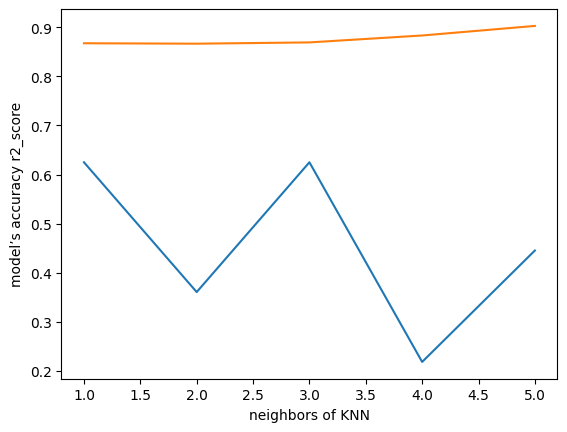

<function matplotlib.pyplot.show(close=None, block=None)>

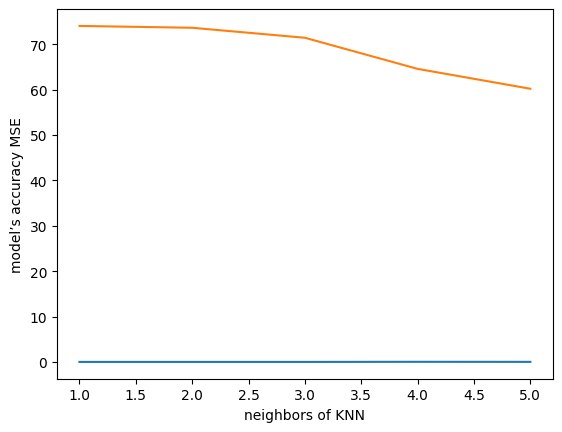

In [15]:
import matplotlib.pyplot as plt
plt.figure()
x = [5,4,3,2,1]
plt.plot(x,lista_df1)
plt.plot(x,lista_df2)
plt.xlabel('neighbors of KNN')
plt.ylabel('model’s accuracy r2_score')
plt.show()

plt.figure()
plt.plot(x,lista_df11)
plt.plot(x,lista_df22)
plt.xlabel('neighbors of KNN')
plt.ylabel('model’s accuracy MSE')
plt.show

## Create a heatmap using the TreeDecissionClassifier using the max depth as X-axis, and max features as the Y-axis and the color of the map should depend on the accuracy of the model on the classification Data Set for the criterion = gini

Accuracy: [0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9135802469135802, 0.9012345679012346, 0.9135802469135802, 0.9135802469135802, 0.8765432098765432, 0.9135802469135802, 0.9506172839506173, 0.9259259259259259, 0.8641975308641975]


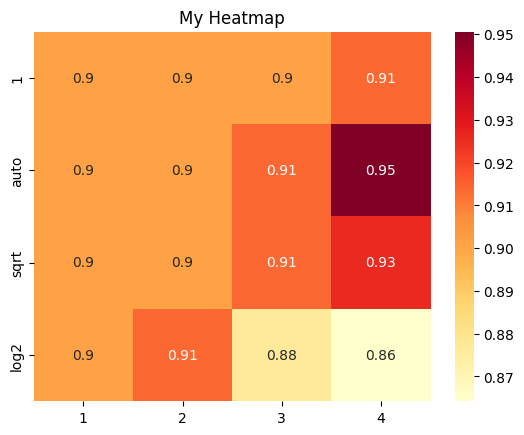

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import random
# Split the dataset into training and testing sets
df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)# print(X_test)
# Create a decision tree classifier with maximum depth of 2
mf = [1,'auto','sqrt','log2']
output = []
for i in range(1,5):
    for j in range(4):
        dtc = DecisionTreeClassifier(max_depth=i,max_features=mf[j],criterion = 'gini')
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        output.append(accuracy)
print(f"Accuracy: {output}")
my_array = np.reshape(output,(4, 4))
my_array = pd.DataFrame(my_array,columns=[1,'auto','sqrt','log2'], index = [1,2,3,4])

import seaborn as sns
import numpy as np
# create a heatmap using seaborn
sns.heatmap(my_array.transpose(), cmap='YlOrRd', annot=True)

# set the plot title
plt.title('My Heatmap')

# show the plot
plt.show()

##  Create a heatmap using the TreeDecissionClassifier using the max depth as X-axis, and max features as Y-axis, and the color of the map should depend on the accuracy of the model on the classification Data Set for the criterion = entropy.

Accuracy: [-0.24223735441539707, 0.12231871712646336, 0.07981213290784128, -1.7929655869496153, -0.9906666805880437, 0.5510925871559524, 0.22631631096451832, 0.028652115288615887, 0.45933102172259166, 0.6980598588884634, 0.10156964421402837, 0.5575050604516203, 0.273594663278219, 0.5896195664022716, 0.5682324060074025, 0.49871744457373024]


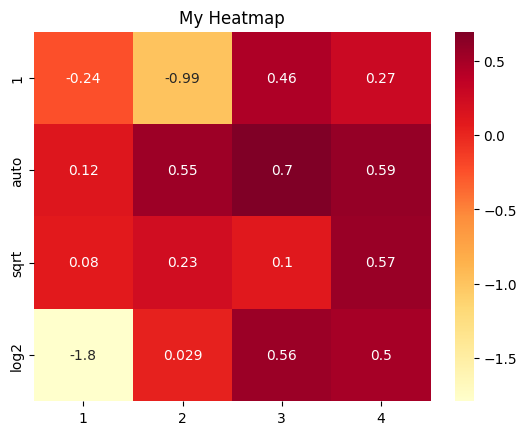

In [17]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import random
# Split the dataset into training and testing sets
df2 = df2.dropna()
X = df2.drop('profile_id',axis=1)
y = df2['profile_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)# print(X_test)
# Create a decision tree classifier with maximum depth of 2
mf = [1,'auto','sqrt','log2']
output = []
for i in range(1,5):
    for j in range(4):
        dtc = DecisionTreeClassifier(max_depth=i,max_features=mf[j],criterion = 'entropy')
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        accuracy = r2_score(y_test, y_pred)
        output.append(accuracy)
print(f"Accuracy: {output}")
my_array = np.reshape(output,(4, 4))
my_array = pd.DataFrame(my_array,columns=[1,'auto','sqrt','log2'], index = [1,2,3,4])

import seaborn as sns
import numpy as np
# create a heatmap using seaborn
sns.heatmap(my_array.transpose(), cmap='YlOrRd', annot=True)

# set the plot title
plt.title('My Heatmap')

# show the plot
plt.show()

##  Create a heatmap using the TreeDecissionRegression using the max depth as X-axis, and max features as Y-axis, and the color of the map should depend on the MSE of the model on the regression Data Set for the criterion = friedman mse.

Accuracy: [0.08505741031590744, 0.06481481481481481, 0.08668673714672455, 0.08505741031590744, 0.07270233196159122, 0.05560493827160493, 0.06255894204389574, 0.08179012345679013, 0.08262716049382718, 0.05708601163146618, 0.07121722273237426, 0.053309226386149454, 0.06629425568819508, 0.044814814814814814, 0.061532431902802276, 0.044814814814814814]


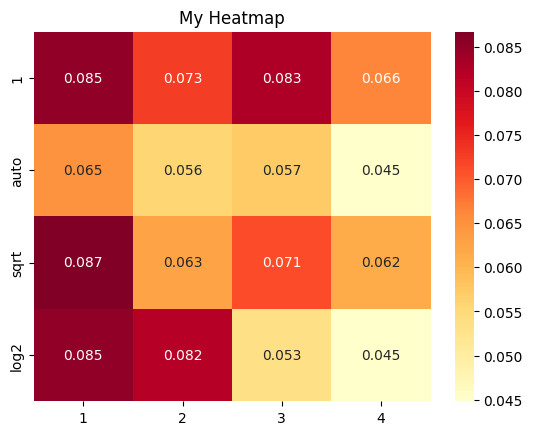

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import random
# Split the dataset into training and testing sets
df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)# print(X_test)
# Create a decision tree classifier with maximum depth of 2
mf = [1,'auto','sqrt','log2']
output = []
for i in range(1,5):
    for j in range(4):
        dtc = DecisionTreeRegressor(max_depth=i,max_features=mf[j],criterion = 'friedman_mse')
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        accuracy = mean_squared_error(y_test, y_pred)
        output.append(accuracy)
print(f"Accuracy: {output}")
my_array = np.reshape(output,(4, 4))
my_array = pd.DataFrame(my_array,columns=[1,'auto','sqrt','log2'], index = [1,2,3,4])

import seaborn as sns
import numpy as np
# create a heatmap using seaborn
sns.heatmap(my_array.transpose(), cmap='YlOrRd', annot=True)

# set the plot title
plt.title('My Heatmap')

# show the plot
plt.show()

##  Create a heatmap using the TreeDecissionRegression using the max depth as X-axis, and max features as Y-axis, and the color of the map should depend on the MSE of the model on the regression Data Set for the criterion = poisson.

Accuracy: [0.002449863600486635, 0.001051273772539013, 0.0024522381629904244, 0.002434417121927791, 0.002303430032359242, 0.0007722095029800147, 0.0010506341467015471, 0.0011209806700936593, 0.0006890763626879343, 0.00028857120716847503, 0.001153061047861797, 0.00028857120716847465, 0.002454446671068792, 0.00028172947805551313, 0.0007936168862475558, 0.0015856192604945128]


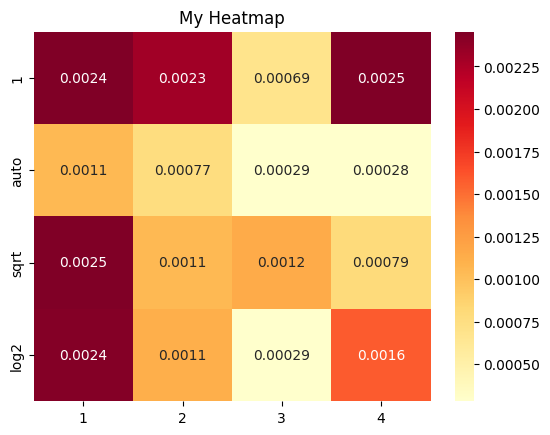

In [19]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
import random
df1 = df1.dropna()
X = df1.drop('price',axis=1)
y = df1['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)# print(X_test)
# Create a decision tree classifier with maximum depth of 2
mf = [1,'auto','sqrt','log2']
output = []
for i in range(1,5):
    for j in range(4):
        dtc = DecisionTreeRegressor(max_depth=i,max_features=mf[j],criterion = 'poisson')
        dtc.fit(X_train, y_train)
        y_pred = dtc.predict(X_test)
        accuracy = mean_squared_error(y_test, y_pred)
        output.append(accuracy)
print(f"Accuracy: {output}")
my_array = np.reshape(output,(4, 4))
my_array = pd.DataFrame(my_array,columns=[1,'auto','sqrt','log2'], index = [1,2,3,4])

import seaborn as sns
import numpy as np
# create a heatmap using seaborn
sns.heatmap(my_array.transpose(), cmap='YlOrRd', annot=True)

# set the plot title
plt.title('My Heatmap')

# show the plot
plt.show()

## Create a line plot using the RandomForestClassifier containing 2 lines for criterion = gini and one for criterion = entropy on X-axis should be the n estimators and one Y-axis the accuracy of the model on the classification Data Set.

(81,)


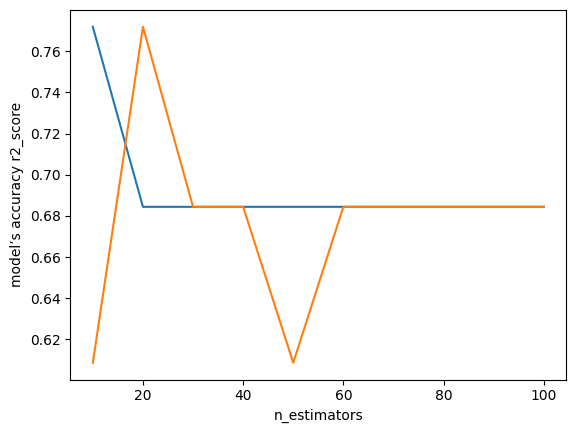

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Define the parameters for the RandomForestClassifier
criterion = ['gini','gini','entropy']
results = []
results2 = []
results3 = []
print(y_test.shape)
# Train the RandomForestClassifier with different parameters
for n in range(10,101,10):
    clf = RandomForestClassifier(n_estimators=n, criterion='gini')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = r2_score(out, y_test)
    results2.append(acc)
for n in range(10,101,10):
    clf = RandomForestClassifier(n_estimators=n, criterion='entropy')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = r2_score(out, y_test)
    results3.append(acc)
# Convert the results to a pandas DataFrame
results
# Create the line plot
# X = df_sorted['n_estimators']
X = [10,20,30,40,50,60,70,80,90,100]
plt.figure()
plt.plot(X,results2)
plt.plot(X,results3)
plt.xlabel('n_estimators')
plt.ylabel('model’s accuracy r2_score')
plt.show()

## Create a line plot using the RandomForestRegressor containing 3 lines for criterion = ”squared error”, criterion = ”absolute error” and one for criterion = ”poisson”, on X-axis should be the 25 n estimators and one Y-axis the MSE of the model on the regression Data Set

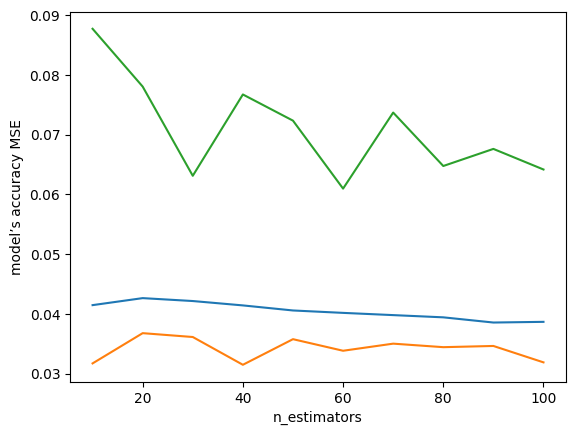

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Define the parameters for the RandomForestClassifier
criterion = ['gini','gini','entropy']
results = []
results2 = []
results3 = []
# Train the RandomForestClassifier with different parameters
for n in range(10,101,10):
    clf = RandomForestRegressor(n_estimators=n, criterion='squared_error', random_state=42)
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = mean_squared_error(out, y_test)
    results.append(acc)
for n in range(10,101,10):
    clf = RandomForestRegressor(n_estimators=n, criterion='absolute_error')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = mean_squared_error(out, y_test)
    results2.append(acc)
for n in range(10,101,10):
    clf = RandomForestRegressor(n_estimators=n, criterion='poisson')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = mean_squared_error(out, y_test)
    results3.append(acc)
# Convert the results to a pandas DataFrame
# Create the line plot
# X = df_sorted['n_estimators']
X = [10,20,30,40,50,60,70,80,90,100]
plt.figure()
plt.plot(X,results)
plt.plot(X,results2)
plt.plot(X,results3)
plt.xlabel('n_estimators')
plt.ylabel('model’s accuracy MSE')
plt.show()

## Create a line plot using the SVC model containing 3 lines for ker- nel= ’poly’, ’rbf ’, ’sigmoid’ on the X-axis should be the C and one Y-axis the accuracy of the model on the classification Data Set

[0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346]
[0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346]
[0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346, 0.9012345679012346]


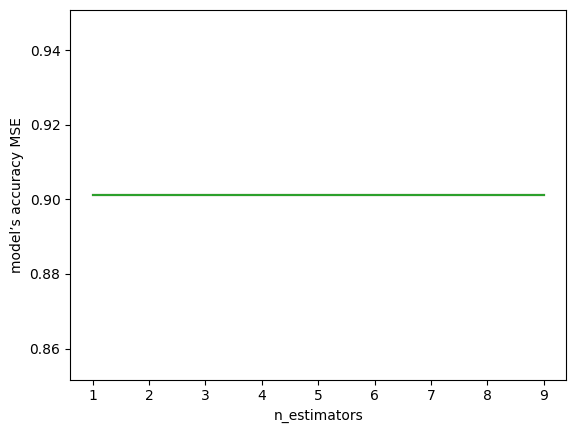

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Define the parameters for the RandomForestClassifier
criterion = ['gini','gini','entropy']
results = []
results2 = []
results3 = []
# Train the RandomForestClassifier with different parameters
for n in range(1,10):
    clf = SVC(C = n, kernel='poly')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = accuracy_score(out, y_test)
    results.append(acc)
for n in range(1,10):
    clf = SVC(C = n, kernel='rbf')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = accuracy_score(out, y_test)
    results2.append(acc)
for n in range(1,10):
    clf = SVC(C = n, kernel='sigmoid')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = accuracy_score(out, y_test)
    results3.append(acc)
# Convert the results to a pandas DataFrame
# Create the line plot
# X = df_sorted['n_estimators']
X = [1,2,3,4,5,6,7,8,9]
plt.figure()
print(results)
print(results2)
print(results3)
plt.plot(X,results)
plt.plot(X,results2)
plt.plot(X,results3)
plt.xlabel('n_estimators')
plt.ylabel('model’s accuracy score')
plt.show()

## Create a line plot using the SVR model containing 3 lines for kernel= ’poly’, ’rbf ’, ’sigmoid’ on the X-axis should be the C and one Y-axis the MSE of the model on the regression Data Set.

[0.0890100969570062, 0.08901095766929616, 0.08901026612905778, 0.08900957623189859, 0.0890088879778203, 0.08900820136682001, 0.08900751639889944, 0.08900683307405854, 0.08900615139229762]
[0.08901130810937052, 0.08901028751363453, 0.08900928389180442, 0.08901249926068981, 0.08901254135648377, 0.08901258493242967, 0.08901262998852487, 0.08901267652477098, 0.08901272454116506]
[0.08900817782102428, 0.08900408391313291, 0.08901095757453537, 0.08901049535372119, 0.08901003337324548, 0.08900957163310906, 0.08900911013331217, 0.08900864887385349, 0.0890081878547332]


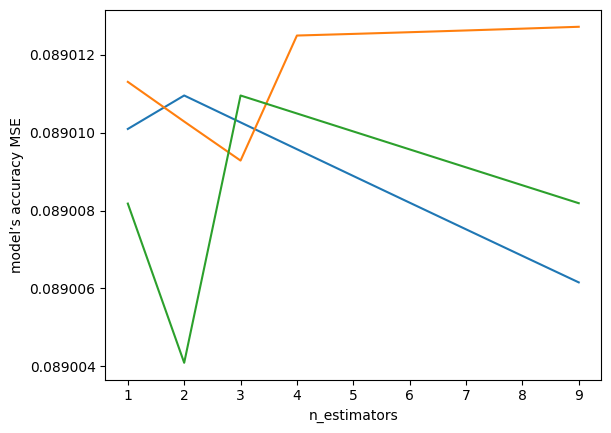

In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
df1 = df1.dropna()
X = df1.drop('city_Dehradun',axis=1)
y = df1['city_Dehradun']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Define the parameters for the RandomForestClassifier
criterion = ['gini','gini','entropy']
results = []
results2 = []
results3 = []
# Train the RandomForestClassifier with different parameters
for n in range(1,10):
    clf = SVR(C = n, kernel='poly')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = mean_squared_error(out, y_test)
    results.append(acc)
for n in range(1,10):
    clf = SVR(C = n, kernel='rbf')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = mean_squared_error(out, y_test)
    results2.append(acc)
for n in range(1,10):
    clf = SVR(C = n, kernel='sigmoid')
    clf.fit(X_train, y_train)
    out = clf.predict(X_test)
    acc = mean_squared_error(out, y_test)
    results3.append(acc)
# Convert the results to a pandas DataFrame
# Create the line plot
# X = df_sorted['n_estimators']
X = [1,2,3,4,5,6,7,8,9]
plt.figure()
print(results)
print(results2)
print(results3)
plt.plot(X,results)
plt.plot(X,results2)
plt.plot(X,results3)
plt.xlabel('n_estimators')
plt.ylabel('model’s accuracy MSE')
plt.show()